In [6]:
library (tidyverse)

library(ggplot2)


In [7]:
col_type = cols(
  .default = col_double(),
  age = col_character(),
  `cocaine-frequency` = col_character(),
  `crack-frequency` = col_character(),
  `heroin-frequency` = col_character(),
  `inhalant-frequency` = col_character(),
  `oxycontin-frequency` = col_character(),
  `meth-frequency` = col_character()
)
drugs = read_csv("drug-use-by-age.csv",col_type = col_type)

drugs %>% head





age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,⋯,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
12,2798,3.9,3,1.1,4,0.1,5.0,0.0,-,⋯,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
13,2757,8.5,6,3.4,15,0.1,1.0,0.0,3.0,⋯,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
14,2792,18.1,5,8.7,24,0.1,5.5,0.0,-,⋯,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
15,2956,29.2,6,14.5,25,0.5,4.0,0.1,9.5,⋯,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
16,3058,40.1,10,22.5,30,1.0,7.0,0.0,1.0,⋯,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
17,3038,49.3,13,28.0,36,2.0,5.0,0.1,21.0,⋯,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


This figure shows the persentage of use of alcohol, cocaine, crack and marijuana in all the groups.

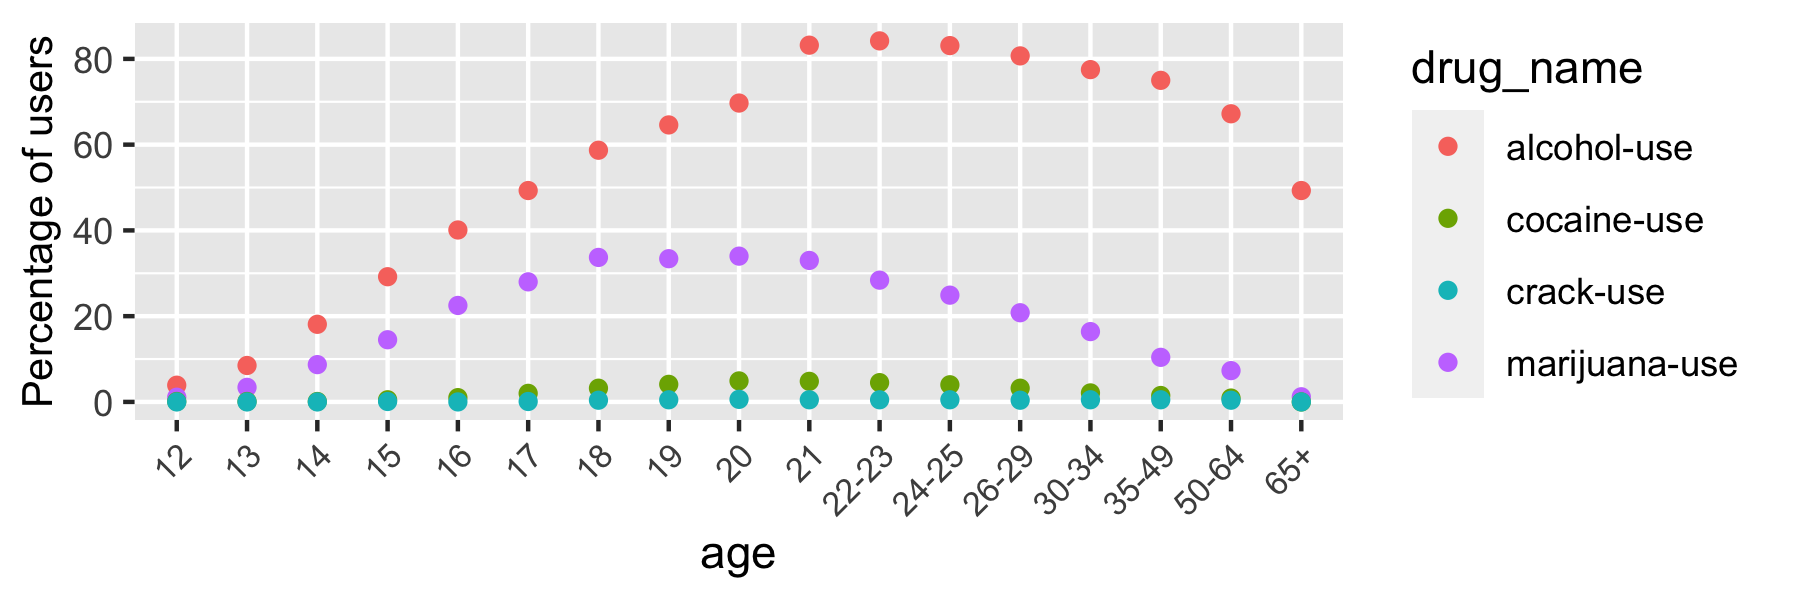

In [50]:
options(repr.plot.res = 300,repr.plot.height = 2,repr.plot.width = 6)
drugs %>% select(1,3,5,7,9,11) %>%
  pivot_longer(., cols = c(2:5), names_to = "drug_name", values_to = "Val") %>%
  ggplot(aes(x = age, y = Val, color = drug_name)) +
  geom_point() +labs(y = "Percentage of users") +
  theme(axis.text.x = element_text(hjust = 1, angle = 45,size=8),axis.title.y = element_text(size=10))



In [18]:
drugs %>% select(age, `alcohol-use`,`marijuana-use` , `cocaine-use`,`crack-use`,`oxycontin-use`,`tranquilizer-use`) %>%
  pivot_longer(., cols = c(`alcohol-use`,`marijuana-use` , `cocaine-use`,`crack-use`,`oxycontin-use`,`tranquilizer-use`), names_to = "drug_name", values_to = "Val")%>%
  filter(age == "65+")

age,drug_name,Val
<chr>,<chr>,<dbl>
65+,alcohol-use,49.3
65+,marijuana-use,1.2
65+,cocaine-use,0.0
65+,crack-use,0.0
65+,oxycontin-use,0.0
65+,tranquilizer-use,0.2


Show the use of all kinds of durgs in 20's group.

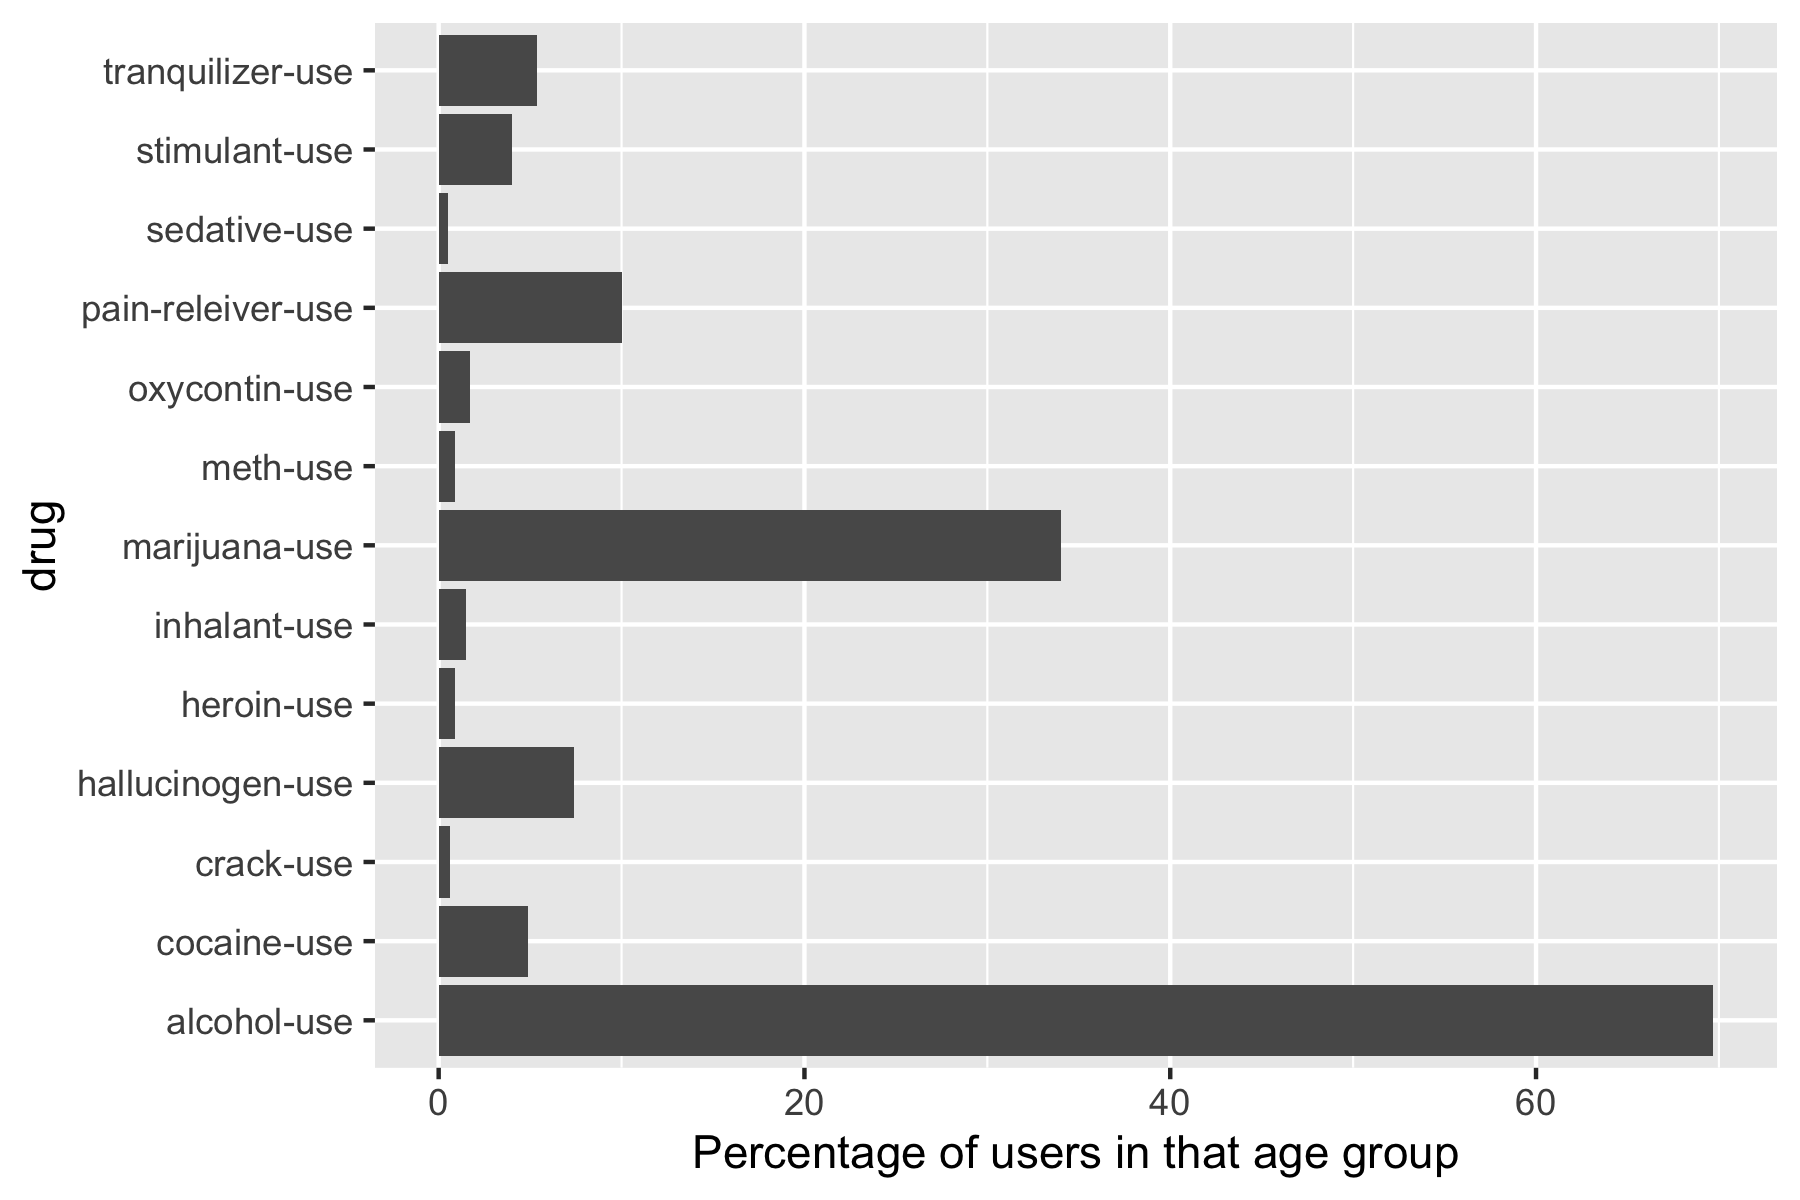

In [9]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)
drugs %>% select(1,3,5,7,9,11,13,15,17,19,21,23,25,27) %>%
  pivot_longer(., cols = c(2:14), names_to = "drug_name", values_to = "Val") %>%
  filter(age == "20") %>%
  ggplot(aes(x = Val,y = fct_infreq(drug_name))) + 
  geom_col() + labs(y = "drug",x = "Percentage of users in that age group")

Get which kind of drugs each group use most.

In [18]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 6)
drugs %>% select(1,3,5,7,9,11,13,15,17,19,21,23,25,27) %>%
  pivot_longer(., cols = c(2:14), names_to = "drug_name", values_to = "Val") %>%
  group_by(age) %>% 
  slice(which.max(Val)) 
 

age,drug_name,Val
<chr>,<chr>,<dbl>
12,alcohol-use,3.9
13,alcohol-use,8.5
14,alcohol-use,18.1
15,alcohol-use,29.2
16,alcohol-use,40.1
17,alcohol-use,49.3
18,alcohol-use,58.7
19,alcohol-use,64.6
20,alcohol-use,69.7
